# Load and minibatch MNIST data
(c) Deniz Yuret, 2019
* Objective: Load the [MNIST](http://yann.lecun.com/exdb/mnist) dataset, convert into Julia arrays, split into minibatches using Knet's [minibatch](http://denizyuret.github.io/Knet.jl/latest/reference/#Knet.minibatch) function and  [Data](https://github.com/denizyuret/Knet.jl/blob/master/src/data.jl) iterator type.
* Prerequisites: [Julia arrays](https://docs.julialang.org/en/v1/manual/arrays)
* New functions: [dir](http://denizyuret.github.io/Knet.jl/latest/reference/#Knet.dir), [minibatch, Data](http://denizyuret.github.io/Knet.jl/latest/reference/#Knet.minibatch), [mnist, mnistview](https://github.com/denizyuret/Knet.jl/blob/master/data/mnist.jl)

In the next few notebooks, we build classification models for the MNIST handwritten digit recognition dataset. MNIST has 60000 training and 10000 test examples. Each input x consists of 784 pixels representing a 28x28 image. The corresponding output indicates the identity of the digit 0..9.

![](http://yann.lecun.com/exdb/lenet/gifs/asamples.gif "MNIST")

[image source](http://yann.lecun.com/exdb/lenet)

In [1]:
# Load packages, import symbols
using Knet: minibatch
using MLDatasets: MNIST
using Images

In [2]:
# This loads the MNIST handwritten digit recognition dataset:
xtrn,ytrn = MNIST.traindata(Float32)
xtst,ytst = MNIST.testdata(Float32)
println.(summary.((xtrn,ytrn,xtst,ytst)));

28×28×60000 Array{Float32,3}
60000-element Array{Int64,1}
28×28×10000 Array{Float32,3}
10000-element Array{Int64,1}


,,,,

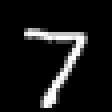
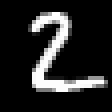
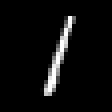
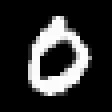
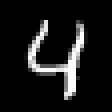

In [3]:
# Here is the first five images from the test set:
[MNIST.convert2image(xtst[:,:,i]) for i=1:5]

In [4]:
# Here are their labels
println(ytst[1:5]);

[7, 2, 1, 0, 4]


In [5]:
# `minibatch` splits the data tensors to small chunks called minibatches.
# It returns an iterator of (x,y) pairs.
dtrn = minibatch(xtrn,ytrn,100)
dtst = minibatch(xtst,ytst,100)

100-element Knet.Train20.Data{Tuple{Array{Float32,3},Array{Int64,1}}}

In [6]:
# Each minibatch is an (x,y) pair where x is 100 (28x28) images and y are the corresponding 100 labels.
# Here is the first minibatch in the test set:
(x,y) = first(dtst)
println.(summary.((x,y)));

28×28×100 Array{Float32,3}
100-element Array{Int64,1}


In [7]:
# Iterators can be used in for loops, e.g. `for (x,y) in dtrn`
# dtrn generates 600 minibatches of 100 images (total 60000)
# dtst generates 100 minibatches of 100 images (total 10000)
n = 0
for (x,y) in dtrn
    n += 1
end
n

600